
# LAT研讨会教程#1:灵敏度曲线(Sensitivity Curves)，信噪比(SNR)，内积(Inner Products)，似然/可能性(Likelihoods)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lisatools.utils.constants import *
from copy import deepcopy  # can be useful


在第一个教程中，我们将学习如何使用`lisatools`为LISA生成灵敏度曲线。有了这些信息，我们将计算基本源集合的内积、信噪比(SNR)和似然/可能性。

## 任务1:绘制和比较灵敏度曲线。

计算并绘制特征应变表示中的**sky-averaged** LISA灵敏度函数([LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens))。将用于LDC2A(或Sangria)数据集的**model**与用于灵敏度曲线的科学需求文档版本(`scirdv1`)进行比较。
有用的文档:
* [get_available_default_lisa_models](https://mikekatz04.github.io/LISAanalysistools/build/html/user/main.html#lisatools.detector.get_available_default_lisa_models)
* [get_stock_sensitivity_options](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.get_stock_sensitivity_options)
* [get_sensitivity](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.get_sensitivity)
* [LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens)

In [2]:
# useful imports
from lisatools.sensitivity import LISASens, get_sensitivity, get_stock_sensitivity_options
import lisatools.detector as lisa_models

In [3]:
lisa_models.sangria

LISAModel(Soms_d=6.241e-23, Sa_a=5.76e-30, orbits=<lisatools.detector.DefaultOrbits object at 0x7f3a29677950>, name='sangria')

In [4]:
get_stock_sensitivity_options()

['X1TDISens',
 'Y1TDISens',
 'Z1TDISens',
 'XY1TDISens',
 'YZ1TDISens',
 'ZX1TDISens',
 'A1TDISens',
 'E1TDISens',
 'T1TDISens',
 'X2TDISens',
 'Y2TDISens',
 'Z2TDISens',
 'LISASens',
 'CornishLISASens',
 'FlatPSDFunction']

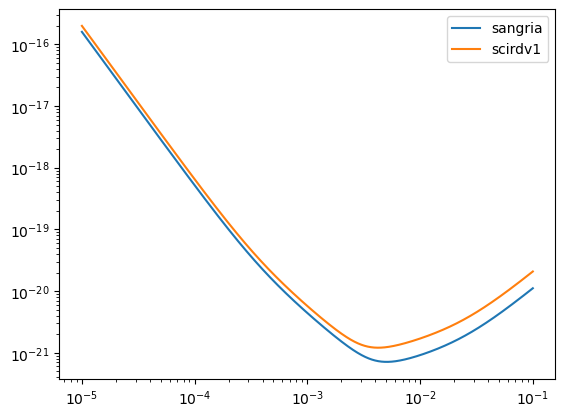

In [5]:
f = np.logspace(-5, -1, 10000)
Sn = get_sensitivity(f, sens_fn=LISASens, average=True, model=lisa_models.sangria, return_type='char_strain')

plt.loglog(f, Sn, label="sangria")

Sn = get_sensitivity(f, sens_fn=LISASens, average=True, model=lisa_models.scirdv1, return_type='char_strain')

plt.loglog(f, Sn, label="scirdv1")
plt.legend()

### 问题1

你认为敏感度曲线模型的差异会如何影响LISA观测?考虑低频或高频的高噪声会对不同的源类产生什么影响。

### 问题2



我们要求你计算天空平均灵敏度（sky-averaging）曲线。这是什么意思?你能在不查看文档的情况下确定总平均指数是多少吗?

In [6]:
Sn_averaged = get_sensitivity(f, sens_fn=LISASens, model=lisa_models.sangria, average=True, return_type="char_strain")
Sn = get_sensitivity(f, sens_fn=LISASens, model=lisa_models.sangria, average=False, return_type="char_strain")

print(Sn_averaged / Sn)

[2.5819889 2.5819889 2.5819889 ... 2.5819889 2.5819889 2.5819889]


现在我们将我们的敏感度信息放入一个[sensitivematrix](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix)中。建立一个双通道(没有交叉通道)灵敏度矩阵，其中两个通道的灵敏度由[LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens)灵敏度函数控制。

有用的文档:
* [SensitivityMatrix](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix)

我们将在这里添加一个额外的有用信息:灵敏度中包含的估计的银河系前景噪声。这在执行LISA数据分析时很重要。

默认的前台函数是 []()。它需要一个参数:以秒为单位的观测时间。使用敏感性函数和随机函数的文档来确定如何通过`lisatools`中的抽象设置传递这些信息。

有用的文档:
* [LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens)
* [FittedHyperbolicTangentGalacticForeground](https://mikekatz04.github.io/LISAanalysistools/build/html/user/stochastic.html#lisatools.stochastic.FittedHyperbolicTangentGalacticForeground)

In [7]:
# imports
from lisatools.sensitivity import SensitivityMatrix, LISASens,A1TDISens

In [8]:
sens_kwargs = dict(
    stochastic_params=(1.0 * YRSID_SI,)
)

sens_mat = SensitivityMatrix(f, [A1TDISens,A1TDISens], **sens_kwargs)

使用矩阵的[loglog](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix.loglog)方法绘制它。

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

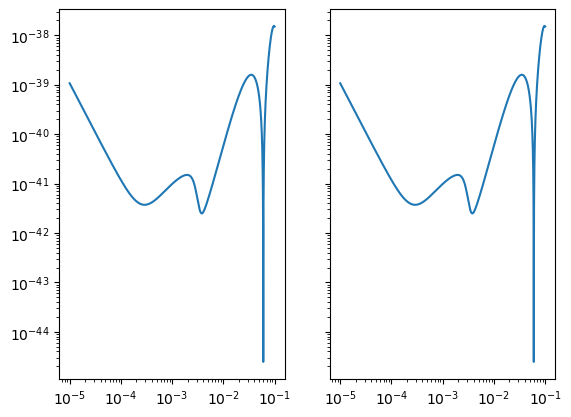

In [9]:
sens_mat.loglog()

比较有和没有前景混淆噪声时的噪声曲线。然后比较两个不同观测时间值下的前景噪声;

有用的文档:
* [update_stochastic](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix.update_stochastic)

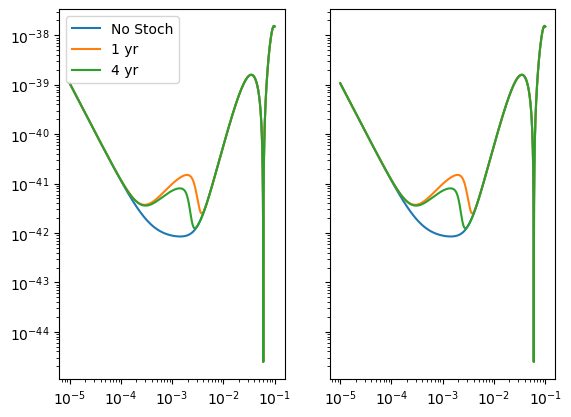

In [10]:
sens_mat_no_confusion = deepcopy(sens_mat)
sens_mat_no_confusion.update_stochastic(stochastic_params=None)

sens_mat_1_yr = deepcopy(sens_mat)
sens_mat_1_yr.update_stochastic(stochastic_params=(1 * YRSID_SI,))

sens_mat_4_yr = deepcopy(sens_mat)
sens_mat_4_yr.update_stochastic(stochastic_params=(4 * YRSID_SI,))

fig, ax = sens_mat_no_confusion.loglog(label="No Stoch")

sens_mat_1_yr.loglog(fig=fig, ax=ax, label="1 yr")
sens_mat_4_yr.loglog(fig=fig, ax=ax, label="4 yr")
ax[0].legend()

### 问题

为什么前景的混乱会随着时间的推移而变化?这对我们的分析有什么更广泛的影响?


### 任务2:构建一个DataResArray来存放和绘制数据信息。

我们将建立一个正弦信号来做一些计算。我们将它存储在一个[DataResArray](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html＃lisatools.datacontainer.DataResidualArray)中。建立一个包含4个参数的正弦信号:$A$(幅度)，$f_0$(频率)，$\dot{f}_0$(频率导数)，$\phi_0$(初始相位):

$$ h_1(t) = A\sin{\left(2\pi (f_0 t + \frac{1}{2}\dot{f}_0t^2) + \phi_0\right)} $$
$$ h_2(t) = A\cos{\left(2\pi (f_0 t + \frac{1}{2}\dot{f}_0t^2) + \phi_0\right)} $$

选择你的参数。对LISA使用合理的时间步长($ \sim10 $ s )和观察时间($ \sim $ yr)。绘制$h_1$和$h_2$。

In [11]:
dt = 10.0
Tobs = YRSID_SI
Nobs = int(Tobs / dt)
t = np.arange(Nobs) * dt

(31556130.0, 31558130.0)

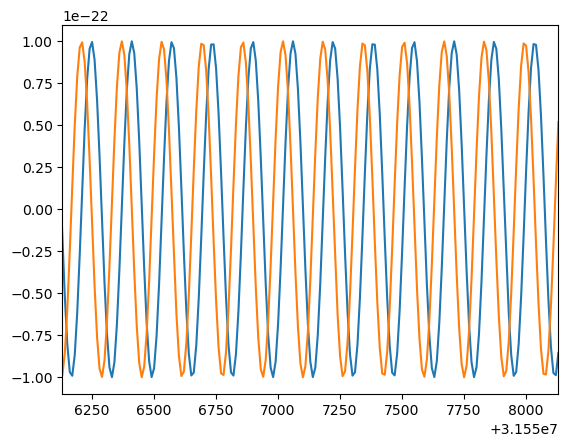

In [12]:
A = 1e-22
f0 = 3e-3
fdot = 1e-10
phi0 = 4.2

h1 = A * np.sin(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
h2 = A * np.cos(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
plt.plot(t, h1, label="h1")
plt.plot(t, h2, label="h2")
plt.xlim(t[-1] - 2000.0, t[-1])

现在我们将两个频道(h1, h2)添加到`DataResArray`中。

有用的文档:
* [DataResidualArray](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.datacontainer.DataResidualArray)

In [13]:
# useful imports
from lisatools.datacontainer import DataResidualArray

In [14]:
data_res_arr = DataResidualArray([h1, h2], dt=dt)

/root/anaconda3/envs/lisa_env/lib/python3.12/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


使用数据残差数组绘图函数绘制信号。

有用的文档:
* [loglog](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.datacontainer.DataResidualArray.loglog)

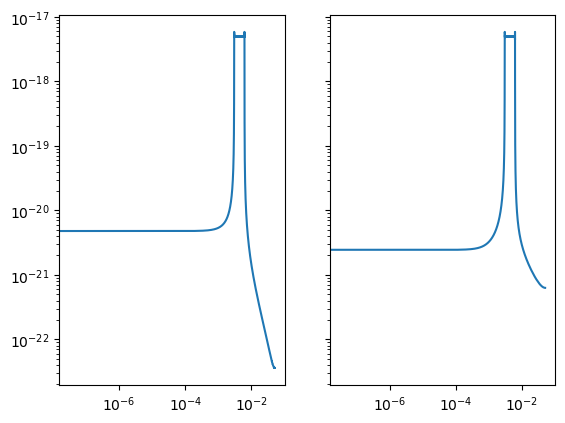

In [15]:
fig, ax = data_res_arr.loglog()

### 问题3


当你输入时域信号时，`DataResidualArray`类会在底层对其进行转换。看看上面的输出，它做了什么转换?

让我们使用numpy (`np.fft.rfft`)对输入时域数据集进行FFT，并将其添加到上面的图中。

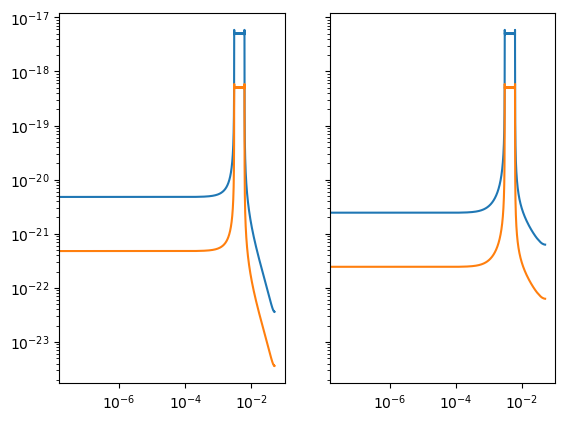

In [16]:
fig, ax = data_res_arr.loglog()
h1_f = np.abs(np.fft.rfft(h1))
h2_f = np.abs(np.fft.rfft(h2))
ax[0].loglog(data_res_arr.f_arr, h1_f)
ax[1].loglog(data_res_arr.f_arr, h2_f)


我们所做的FFT和存储在`DataResidualArray`中的频域频谱之间的因子差异是什么?这个术语从何而来，为什么会出现?(这是一个很容易忘记的小细节)

In [17]:
np.abs(data_res_arr[0]) / h1_f

array([10., 10., 10., ..., 10., 10., 10.])


## 任务3:组合成一个`AnalysisContainer`。

现在我们将使用我们的数据和敏感性信息，并将其组合到一个[AnalysisContainer](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#analysis-container)对象中。该对象通过在底层正确地处理不同的数据和敏感度矩阵来帮助简化分析。

绘制包含数据和敏感度信息的新设置。稍后我们将对这个对象进行计算。

帮助文档:
* [AnalysisContainer](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#analysis-container)
* [AnalysisContainer.loglog](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.loglog)

In [18]:
from lisatools.analysiscontainer import AnalysisContainer

In [19]:
analysis = AnalysisContainer(data_res_arr, sens_mat)

/root/anaconda3/envs/lisa_env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/root/anaconda3/envs/lisa_env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(1e-24, 1e-19)

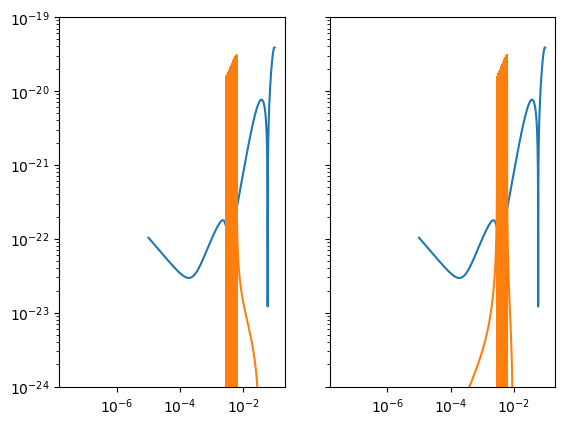

In [20]:
fig, ax = analysis.loglog()
ax[0].set_ylim(1e-24, 1e-19)

## 任务4:计算内积。



现在我们将向数据中注入一个信号，并计算另一个信号与该数据的内积。我们将把`data_res_arr`作为数据输入。

使用与你上面选择的注入稍有不同的一组参数生成一个新信号。

In [21]:
A_new = A # 1.01e-22
f0_new = f0 # 3.0000003e-3
fdot_new = fdot * (1.000001)
phi0_new = phi0  # 3.1

In [22]:
h1_new = A_new * np.sin(2 * np.pi * (f0_new * t + 1/2 * fdot_new * t ** 2) + phi0_new)
h2_new = A_new * np.cos(2 * np.pi * (f0_new * t + 1/2 * fdot_new * t ** 2) + phi0_new)

### 问题：


新信号与注入数据的内积值是多少?在numpy中使用下面的公式计算内积:

$$ \langle h_1 | h_2 \rangle = 4 \text{Re} \int_{f_\text{min}}^{f_\text{max}}\frac{\tilde{h}_1(f)^*\tilde{h}_2(f)}{S_n(f)}df \ \ .$$


In [39]:
template = DataResidualArray([h1_new, h2_new], dt=dt)
sens_mat.update_frequency_arr(template.f_arr)
hold_hnew = 4 * template.df * np.real(np.sum(template[:, 1:].conj() * data_res_arr[:, 1:] / sens_mat[:, 1:]))
print(hold_hnew)

/root/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:83: RuntimeWarning: divide by zero encountered in divide
  Sa_a = Sa_a_in * (1.0 + (0.4e-3 / frq) ** 2) * (1.0 + (frq / 8e-3) ** 4)
/root/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:85: RuntimeWarning: divide by zero encountered in power
  Sa_d = Sa_a * (2.0 * np.pi * frq) ** (-4.0)
/root/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:87: RuntimeWarning: invalid value encountered in multiply
  Sa_nu = Sa_d * (2.0 * np.pi * frq / C_SI) ** 2
/root/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:92: RuntimeWarning: divide by zero encountered in divide
  Soms_d = Soms_d_in * (1.0 + (2.0e-3 / f) ** 4)
/root/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:94: RuntimeWarning: invalid value encountered in multiply
  Soms_nu = Soms_d * (2.0 * np.pi * frq / C_SI) ** 2
/root/anaconda3/envs/l

157265.40056575966



现在，使用`AnalysisContainer`类中的[inner_product](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.inner_product)方法计算内积。

In [40]:
analysis.template_inner_product(template)

157265.4005657595

数字可能不完全匹配。在底层，`lisatools`中的内积函数使用了`np.trapz`。如果你做一个和，你可能会得到一个非常小的，可以忽略不计的差异。

使用上面选择的参数。尝试理解内积如何随你选择的参数而变化(即它们与注入参数的距离)。 

## 任务5:计算信噪比。

LISA开发人员对两种信噪比(SNR)很感兴趣。一个是模板的最佳SNR ($\rho_\text{opt}$)。这是一个模板对于给定的噪声轮廓可能达到的最大信噪比($h$是模板):
$$ \rho_\text{opt} = \sqrt{\langle h | h \rangle}\ \ .  $$
换句话说，如果注入数据与模板完全相同，则可以达到这个信噪比。

另一个值得关注的SNR是检测到的SNR ($\rho_\text{det}$)。它由下给出，
$$ \rho_\text{det} = \frac{\langle d | h \rangle}{\sqrt{\langle h | h \rangle}} = \frac{\langle d | h \rangle}{\rho_\text{opt}}\ \ .  $$

上面，你计算了  $\langle h | h \rangle$  ，现在使用numpy数组操作计算 $\langle h | h \rangle$，并计算出检测到的最佳SNR。

In [41]:
hnew_hnew = 4 * template.df * np.real(np.sum(template[:, 1:].conj() * template[:, 1:] / sens_mat[:, 1:]))
print(hnew_hnew)
print(f"Opt SNR: {np.sqrt(hnew_hnew)}, Det SNR: {hold_hnew / np.sqrt(hnew_hnew)}")

158169.98904394475
Opt SNR: 397.70590773075617, Det SNR: 395.4313916609635



要用`AnalysisContainer`对象计算这些值，请使用[template_snr](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.template_snr)方法。

In [42]:
opt_snr, det_snr = analysis.template_snr(template)
print(f"Opt SNR: {opt_snr}, Det SNR: {det_snr}")

Opt SNR: 397.70590773075594, Det SNR: 395.43139166096336


### 问题：

改变模板的参数会如何影响最佳信噪比和检测到的信噪比?

##  任务6:计算似然/可能性。



LISA(和GWs的其他领域)中使用的似然是一种高斯似然，它用残差数据与其本身的噪声加权内积替换了典型的 $\frac{x - \mu}{\sigma}$ 项:$\langle \vec{d} - \vec{h} | \vec{d} - \vec{h} \rangle$。让我们分解一下。

1) 当我们说残差是什么意思?它是数据和模板之间的区别。

$$ \vec{r} = \vec{d} - \vec{h} $$

计算数据和模板的残差，并将其存储在新的`DataResidualArray`中。

In [43]:
r1 = h1_new - h1
r2 = h2_new - h2

residual = DataResidualArray([r1, r2], dt=dt)


2) 计算残差与自身的内积。提示:你可以把它放在一个新的`AnalysisContainer`中，然后直接用它来计算。

In [44]:
analysis_res = AnalysisContainer(residual, sens_mat)
print(analysis_res.inner_product())

1809.3808500887073



3) 建立完全的可能性。高斯似然/可能性由:
$$ \mathcal{L} = e^{-\frac{1}{2}\langle \vec{d} - \vec{h} | \vec{d} - \vec{h} \rangle} \ \ . $$

我们通常使用似然/可能性的自然对数:
$$ \ln{\mathcal{L}} = -\frac{1}{2}\langle \vec{d} - \vec{h} | \vec{d} - \vec{h} \rangle \ \ . $$

考虑到这一点。从上面获取内积值并计算此模板的可能性。

In [45]:
likelihood = -1/2 * analysis_res.inner_product()
print(f"Likelihoood: {likelihood}")

Likelihoood: -904.6904250443537



因为内积是一个线性运算，所以我们也可以将内积分解为一般的部分:
$$ \ln{\mathcal{L}} = -\frac{1}{2}\left(\langle \vec{d} | \vec{d}\rangle + \langle \vec{h} | \vec{h}\rangle - 2 \langle \vec{d} | \vec{h}\rangle\right) \ \ . $$

你会看到一些熟悉的术语出现:
* $\langle \vec{h} | \vec{h}\rangle = \rho_\text{opt}^2$
* $\langle \vec{d} | \vec{h}\rangle \sim \rho_\text{det} * \rho_\text{opt}$(当阶段最大化时)
* $\langle \vec{d} | \vec{d}\rangle$是数据与自身的内积。通常在MCMC分析中，$\langle \vec{d} | \vec{d}\rangle$项在整个采样过程中保持不变。

你可以使用`AnalysisContainer`类中的[template＿likelihood](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html＃lisatools.analysiscontainer.AnalysisContainer.template＿likelihood)方法计算模板与数据的可能性。

In [46]:
analysis.template_likelihood(template)

-904.6904250442749

### 问题：



改变参数对可能性有何影响?这与最佳SNR值和检测到的SNR值有什么关系?在[template_likelihood](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.template_snr)方法中有两个有趣的关键字参数:`include_psd_info`和`phase_maximize`。`phase_maximize`参数可以用于似然和SNR计算。阅读文档并添加这些键值参数，你能弄清楚它们如何进行这些计算吗?

##  任务7:添加一个信号模型。


现在我们将一个信号模型添加到似然类中。你可以在实例化`AnalysisContainer`时将其设置为关键字参数。或者你可以在事后将它设置为一个属性。

但首先，我们需要将正弦信号转换为函数。构建一个函数，接收我们的四个参数($A$、$f_0$、$\dot{f}_0$和 $\phi_0$ )，并返回一个`[h1, h2]`的列表。将时间数组作为参数添加到生成器中。所以它应该有这样的签名:` sinusoidal＿waveform(A: float, f0: float, fdot0: float, phi0: float, t＿arr: np.ndarray)`

In [47]:
def sinusoidal_waveform(A: float, f0: float, fdot: float, phi0: float, t: np.ndarray, **kwargs) -> [np.ndarray, np.ndarray]:
    h1 = A * np.sin(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
    h2 = A * np.cos(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
    return [h1, h2]


现在通过更新`signal_gen`属性，将信号模型添加到似然类中。

In [48]:
analysis.signal_gen = sinusoidal_waveform


使用一组新参数计算可能性。记得把`t`作为输入的最后一个参数。

帮助文档:
* [AnalysisContainer.calculate_signal_likelihood](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.calculate_signal_likelihood)

In [49]:
analysis.calculate_signal_likelihood(A*1.01, f0*1.00, fdot, phi0, t, source_only=True)

-7.908509646949824

## 补充题


 现在重复本教程的各个部分，调整信号或灵敏度模型。观察这是如何改变内积、信噪比和可能性的。了解这些元素对LISA数据分析至关重要!

# 学习总结和收获概述

### 教程结构和内容
1. 理论介绍:
开头部分介绍了波形信号的基本理论，例如正弦和余弦波形的概念，以及它们在信号处理中的地位。
2. 参数定义:
定义了波形生成所需的参数，如振幅$A$、频率$f$ 、和初始相位$\phi_0$ 
3. 函数实现:
实现了一个函数 sinusoidal_waveform，该函数基于给定的参数和时间数组生成正弦和余弦波形。
4. 信号模型集成:
将生成的波形函数集成到一个名为 AnalysisContainer 的类中，该类用于计算信号的可能性/似然。
5. 可能性/似然计算:
用一组新的参数来计算可能性/似然，以及如何调用已集成的波形函数来评估特定参数下的信号。
### 学习总结
本人在教程的引导下了解波形信号的生成和分析，尤其是在处理涉及频率和相位变化的复杂信号时。同时教程引导我接触了参数化模型在信号处理中的应用，以及通过实际编程实现来理解理论概念的重要性。同时本人在教程的引导下，计算了似然/可能性、内积等，以及在帮助文档的帮助下，知道了应如何在python中进行表达式的编写。本教程专注于lisa物理本身，本人也在其中了解了一些数据处理的思路，比如如何注入信噪比等等。
